In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "tmp5"

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
																			rotation_range=30,
																			height_shift_range=0.2,
                                      fill_mode='nearest')

VALIDATION_DIR = "tmp6"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size = 64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size= 16
)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import RMSprop,Adam
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         2457984   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 384)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('val_acc')>=0.98):
#       print('\nReached ^98%')
#       self.model.stop_training = True
# callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 15
    #callbacks=[callbacks]
)

Epoch 1/50
15/15 [==============================] - 41s 3s/step - loss: 0.5109 - acc: 0.7162 - val_loss: 0.3878 - val_acc: 0.8577
Epoch 2/50
15/15 [==============================] - 41s 3s/step - loss: 0.3577 - acc: 0.8624 - val_loss: 0.2366 - val_acc: 0.9331
Epoch 3/50
15/15 [==============================] - 40s 3s/step - loss: 0.2806 - acc: 0.8865 - val_loss: 0.2573 - val_acc: 0.9205
Epoch 4/50
15/15 [==============================] - 40s 3s/step - loss: 0.2419 - acc: 0.9159 - val_loss: 0.2733 - val_acc: 0.8996
Epoch 5/50
15/15 [==============================] - 39s 3s/step - loss: 0.2210 - acc: 0.9181 - val_loss: 0.2695 - val_acc: 0.9289
Epoch 6/50
15/15 [==============================] - 39s 3s/step - loss: 0.2372 - acc: 0.9094 - val_loss: 0.2579 - val_acc: 0.8996
Epoch 7/50
15/15 [==============================] - 40s 3s/step - loss: 0.2090 - acc: 0.9181 - val_loss: 0.2104 - val_acc: 0.9456
Epoch 8/50
15/15 [==============================] - 40s 3s/step - loss: 0.2207 - acc: 0.91

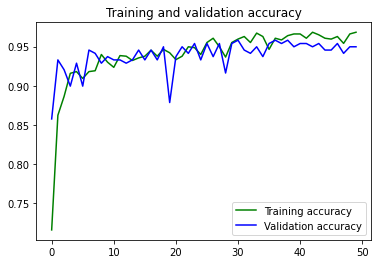

<Figure size 432x288 with 0 Axes>

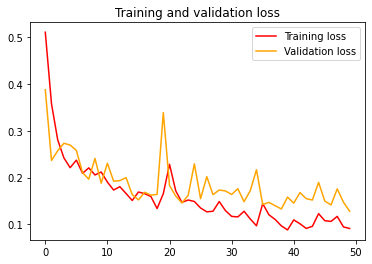

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [7]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving fire.jpg to fire (3).jpg
Saving me.jpg to me (3).jpg
Saving nonfire.jpg to nonfire (3).jpg
True 0.9651741
True 0.5265175
False 0.994662
